# Exploratory Data Analysis: STAR Project

The **Student Achievement and Retention (STAR)** project is a randomized controlled trial conducted at a Canadian university. Students were randomly assigned to one of four groups:

- **Control** -- no intervention
- **SSP** (Student Support Program) -- academic support services
- **SFP** (Student Fellowship Program) -- financial incentives tied to GPA
- **SFSP** -- combined SSP + SFP

Key outcomes include first- and second-year GPA, credits earned, good academic standing, and probation status.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 120

df = pd.read_stata("data/116327-V1/STAR_extracted/STARdatapost/STAR_public_use.dta")
print(f"Observations: {df.shape[0]}, Variables: {df.shape[1]}")
df.head()

Observations: 1656, Variables: 48


,GPA_year1,GPA_year2,age,chooseUTM,compsurv,control,credits_earned1,credits_earned2,dad1,dad2,...,sfsp,sfsp_p,signup,ssp,ssp_p,totcredits_year1,used_adv,used_fsg,used_ssp,work1
0,2.58,3.49,18,0.0,1.0,1,2.5,3.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
1,3.55,2.96,17,0.0,1.0,0,3.5,3.5,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
2,3.75,3.31,19,0.0,1.0,1,3.0,4.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
3,2.37,2.62,18,0.0,1.0,1,3.5,2.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0
4,1.68,2.47,19,0.0,1.0,1,2.5,3.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0


## 1. Data Overview

In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   GPA_year1           1537 non-null   float32 
 1   GPA_year2           1368 non-null   float32 
 2   age                 1656 non-null   int8    
 3   chooseUTM           1472 non-null   float32 
 4   compsurv            1656 non-null   float32 
 5   control             1656 non-null   int8    
 6   credits_earned1     1575 non-null   float32 
 7   credits_earned2     1575 non-null   float32 
 8   dad1                1472 non-null   float32 
 9   dad2                1472 non-null   float32 
 10  dad_edn             1472 non-null   category
 11  english             1656 non-null   int8    
 12  female              1656 non-null   int8    
 13  finish4             1472 non-null   float64 
 14  goodstanding_year1  1634 non-null   float32 
 15  goodstanding_year2  1634 non-null   float32 
 16 

In [3]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
GPA_year1,1537.0,1.787,0.906,0.0,1.12,1.800,2.43,4.0
GPA_year2,1368.0,2.043,0.908,0.0,1.50,2.125,2.68,4.0
age,1656.0,18.291,0.629,17.0,18.00,18.000,19.00,23.0
chooseUTM,1472.0,0.259,0.438,0.0,0.00,0.000,1.00,1.0
compsurv,1656.0,0.889,0.314,0.0,1.00,1.000,1.00,1.0
control,1656.0,0.607,0.488,0.0,0.00,1.000,1.00,1.0
credits_earned1,1575.0,2.354,0.995,0.0,2.00,2.500,3.00,7.5
credits_earned2,1575.0,2.443,1.489,0.0,1.50,2.500,3.50,7.5
dad1,1472.0,0.844,0.363,0.0,1.00,1.000,1.00,1.0
dad2,1472.0,0.453,0.498,0.0,0.00,0.000,1.00,1.0


## 2. Missing Data

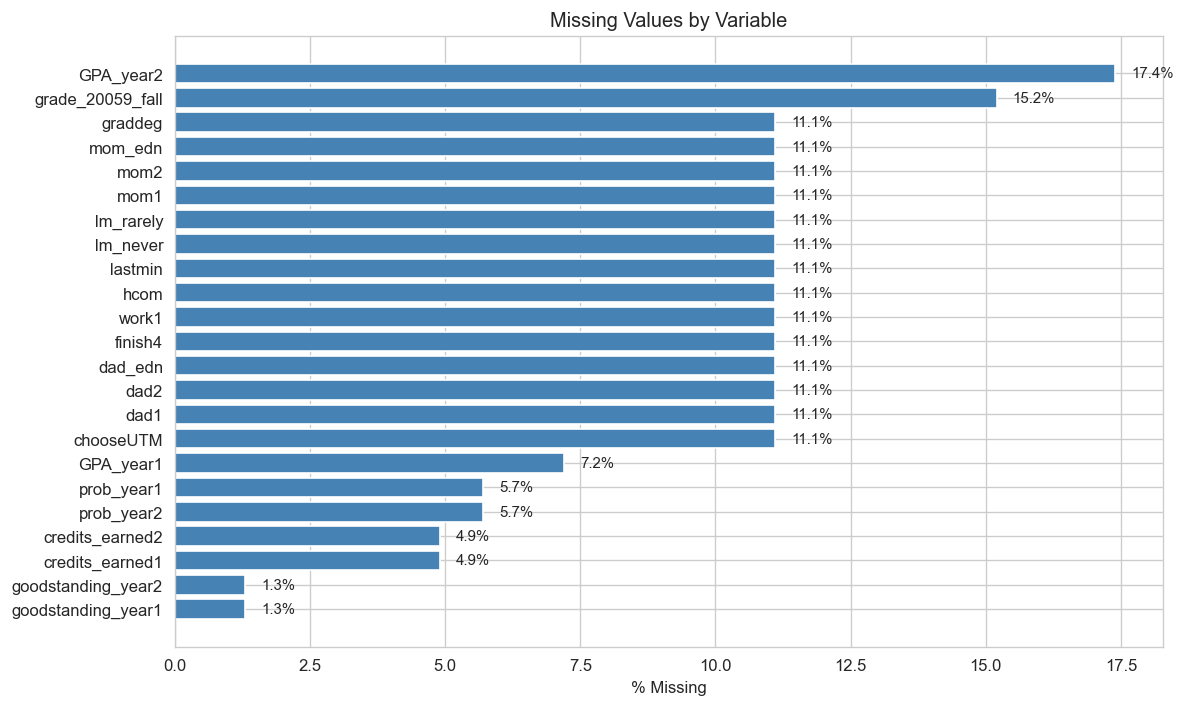


Note: 184 missing values (11.1%) correspond to students who did not complete the survey (compsurv == 0).
Non-survey completers: 184


In [4]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(1)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(missing.index, missing_pct, color="steelblue")
ax.set_xlabel("% Missing")
ax.set_title("Missing Values by Variable")
for bar, pct in zip(bars, missing_pct):
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2,
            f"{pct}%", va="center", fontsize=9)
ax.invert_yaxis()
plt.tight_layout()
fig.savefig("figures/eda/missing_data.png", dpi=150, bbox_inches="tight")
plt.show()

print("\nNote: 184 missing values (11.1%) correspond to students who did not complete the survey (compsurv == 0).")
print(f"Non-survey completers: {(df['compsurv'] == 0).sum()}")

## 3. Treatment Assignment

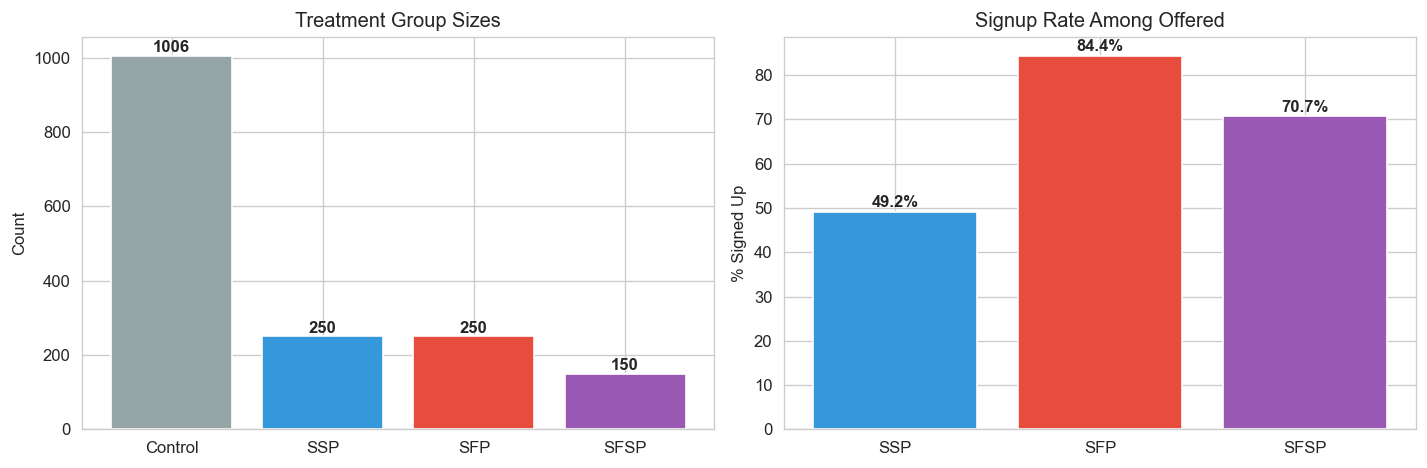

In [5]:
# Create a treatment group variable
def assign_group(row):
    if row["sfsp"] == 1:
        return "SFSP"
    elif row["sfp"] == 1:
        return "SFP"
    elif row["ssp"] == 1:
        return "SSP"
    else:
        return "Control"

df["treatment"] = df.apply(assign_group, axis=1)

group_counts = df["treatment"].value_counts().reindex(["Control", "SSP", "SFP", "SFSP"])
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

colors = ["#95a5a6", "#3498db", "#e74c3c", "#9b59b6"]
axes[0].bar(group_counts.index, group_counts.values, color=colors)
axes[0].set_ylabel("Count")
axes[0].set_title("Treatment Group Sizes")
for i, v in enumerate(group_counts.values):
    axes[0].text(i, v + 10, str(v), ha="center", fontweight="bold")

# Signup rates among treated
treated = df[df["control"] == 0]
signup_rates = treated.groupby("treatment")["signup"].mean().reindex(["SSP", "SFP", "SFSP"])
axes[1].bar(signup_rates.index, signup_rates.values * 100, color=colors[1:])
axes[1].set_ylabel("% Signed Up")
axes[1].set_title("Signup Rate Among Offered")
for i, v in enumerate(signup_rates.values):
    axes[1].text(i, v * 100 + 1, f"{v*100:.1f}%", ha="center", fontweight="bold")

plt.tight_layout()
fig.savefig("figures/eda/treatment_groups.png", dpi=150, bbox_inches="tight")
plt.show()

## 4. Demographics

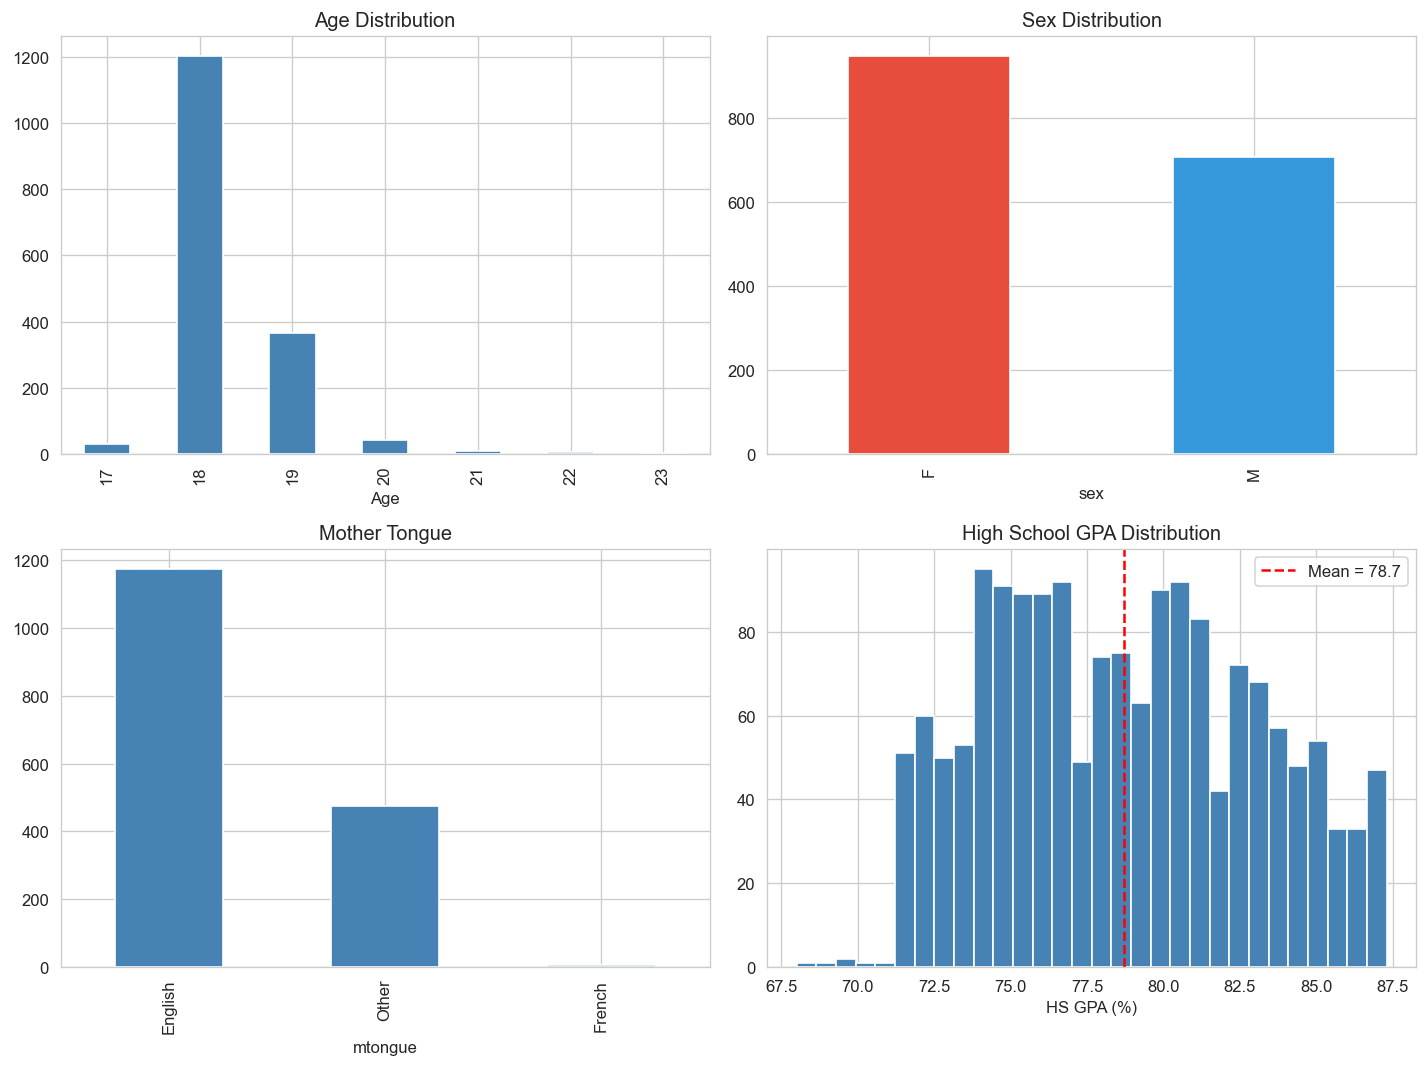

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Age distribution
df["age"].value_counts().sort_index().plot.bar(ax=axes[0, 0], color="steelblue")
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age")

# Sex
df["sex"].value_counts().plot.bar(ax=axes[0, 1], color=["#e74c3c", "#3498db"])
axes[0, 1].set_title("Sex Distribution")

# Mother tongue
df["mtongue"].value_counts().plot.bar(ax=axes[1, 0], color="steelblue")
axes[1, 0].set_title("Mother Tongue")

# High school GPA
axes[1, 1].hist(df["gpa0"], bins=30, color="steelblue", edgecolor="white")
axes[1, 1].axvline(df["gpa0"].mean(), color="red", linestyle="--", label=f'Mean = {df["gpa0"].mean():.1f}')
axes[1, 1].set_title("High School GPA Distribution")
axes[1, 1].set_xlabel("HS GPA (%)")
axes[1, 1].legend()

plt.tight_layout()
fig.savefig("figures/eda/demographics.png", dpi=150, bbox_inches="tight")
plt.show()

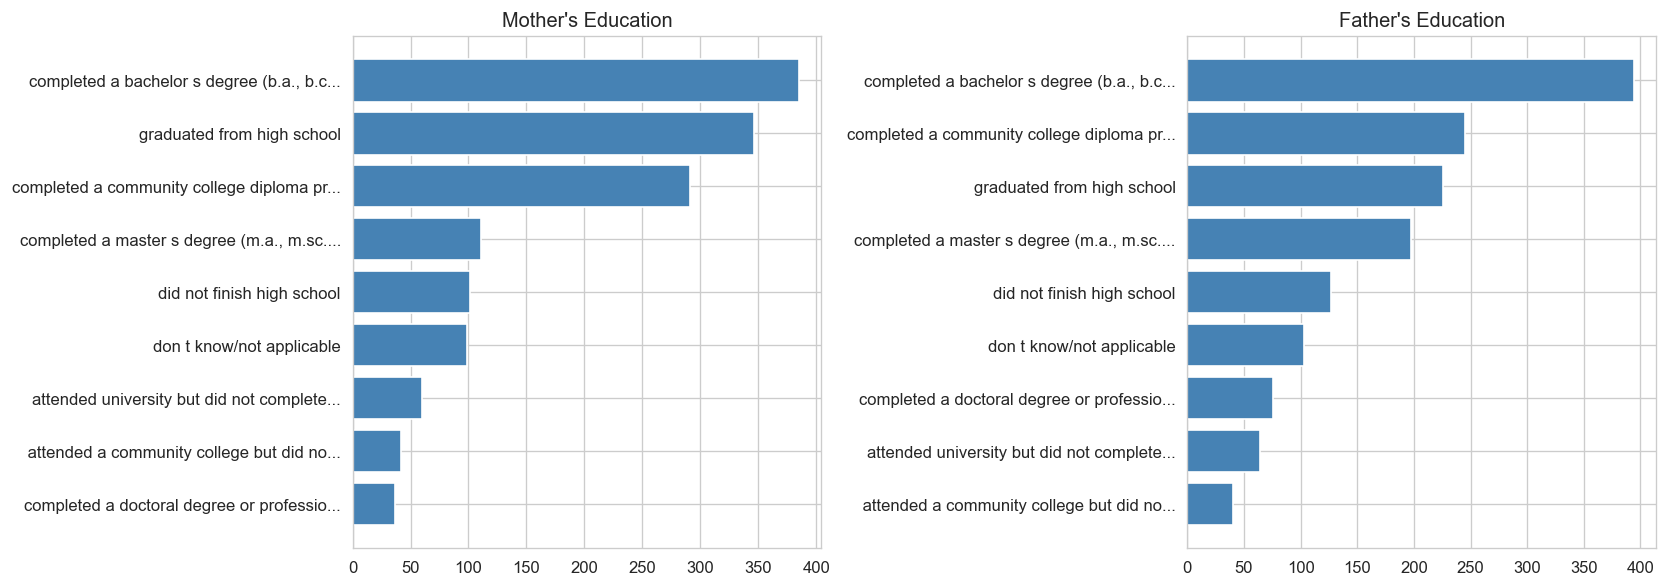

In [7]:
# Parental education
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, col, title in zip(axes, ["mom_edn", "dad_edn"], ["Mother's Education", "Father's Education"]):
    counts = df[col].value_counts()
    short_labels = [str(l)[:40] + "..." if len(str(l)) > 40 else str(l) for l in counts.index]
    ax.barh(short_labels, counts.values, color="steelblue")
    ax.set_title(title)
    ax.invert_yaxis()

plt.tight_layout()
fig.savefig("figures/eda/parental_education.png", dpi=150, bbox_inches="tight")
plt.show()

## 5. Balance Check Across Treatment Groups

In [8]:
balance_vars = ["gpa0", "age", "female", "english", "hsgroup", "mom2", "dad2"]
balance = df.groupby("treatment")[balance_vars].mean().T
balance = balance[["Control", "SSP", "SFP", "SFSP"]].round(3)
balance

treatment,Control,SSP,SFP,SFSP
gpa0,78.672,78.847,78.820,78.475
age,18.292,18.280,18.272,18.333
female,0.571,0.568,0.600,0.547
english,0.701,0.720,0.708,0.747
hsgroup,2.001,2.016,2.020,1.940
mom2,0.363,0.414,0.338,0.307
dad2,0.454,0.473,0.450,0.417


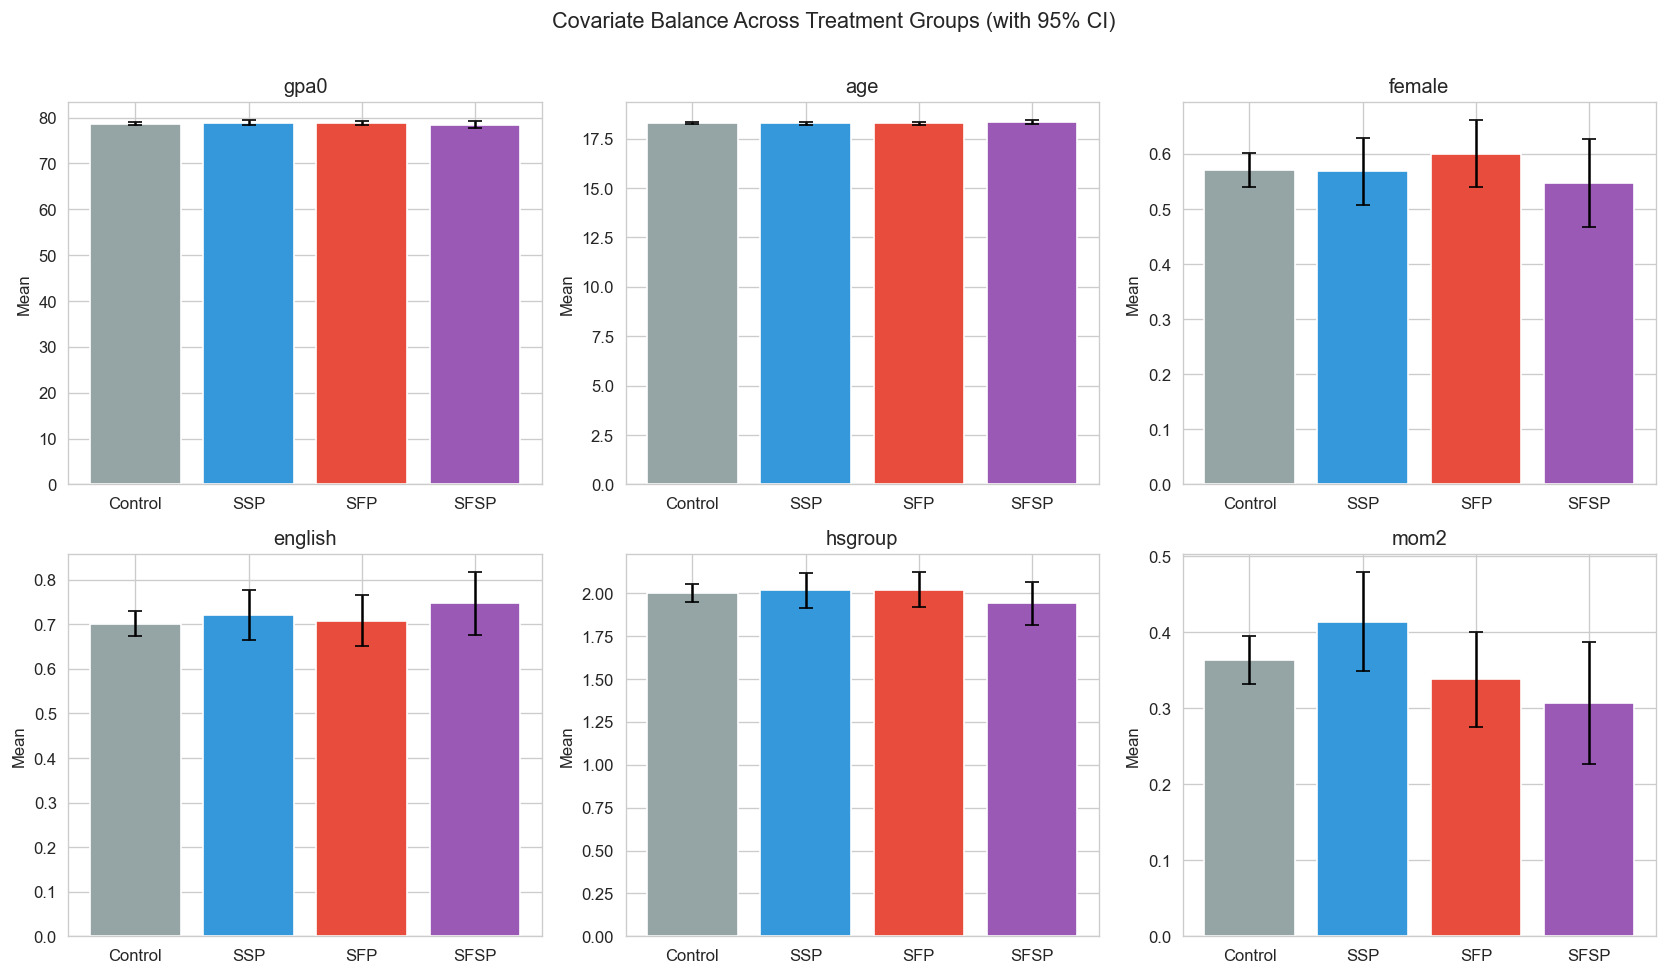

In [9]:
# Visual balance check
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, var in enumerate(balance_vars[:-1]):
    means = df.groupby("treatment")[var].mean().reindex(["Control", "SSP", "SFP", "SFSP"])
    sems = df.groupby("treatment")[var].sem().reindex(["Control", "SSP", "SFP", "SFSP"])
    axes[i].bar(means.index, means.values, yerr=1.96 * sems.values,
                color=colors, capsize=4)
    axes[i].set_title(var)
    axes[i].set_ylabel("Mean")

plt.suptitle("Covariate Balance Across Treatment Groups (with 95% CI)", fontsize=13, y=1.01)
plt.tight_layout()
fig.savefig("figures/eda/balance_check.png", dpi=150, bbox_inches="tight")
plt.show()

## 6. Outcome Variables

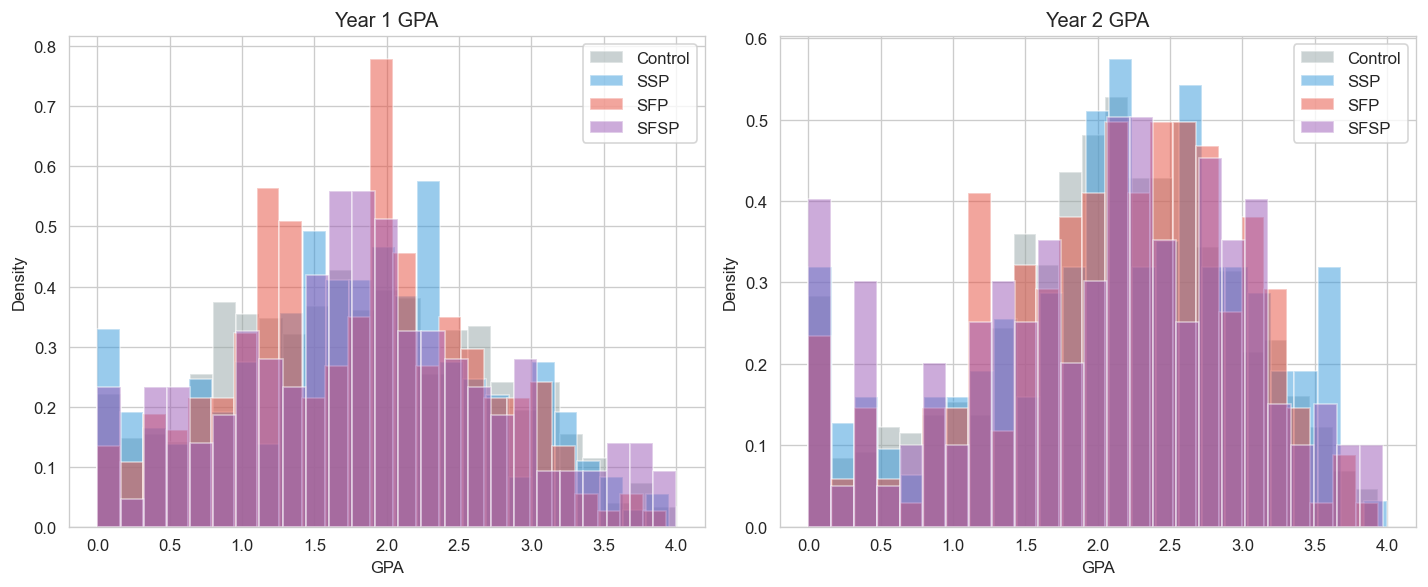

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, col, title in zip(axes, ["GPA_year1", "GPA_year2"], ["Year 1 GPA", "Year 2 GPA"]):
    for grp, color in zip(["Control", "SSP", "SFP", "SFSP"], colors):
        subset = df[df["treatment"] == grp][col].dropna()
        ax.hist(subset, bins=25, alpha=0.5, label=grp, color=color, density=True)
    ax.set_title(title)
    ax.set_xlabel("GPA")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
fig.savefig("figures/eda/gpa_distributions.png", dpi=150, bbox_inches="tight")
plt.show()

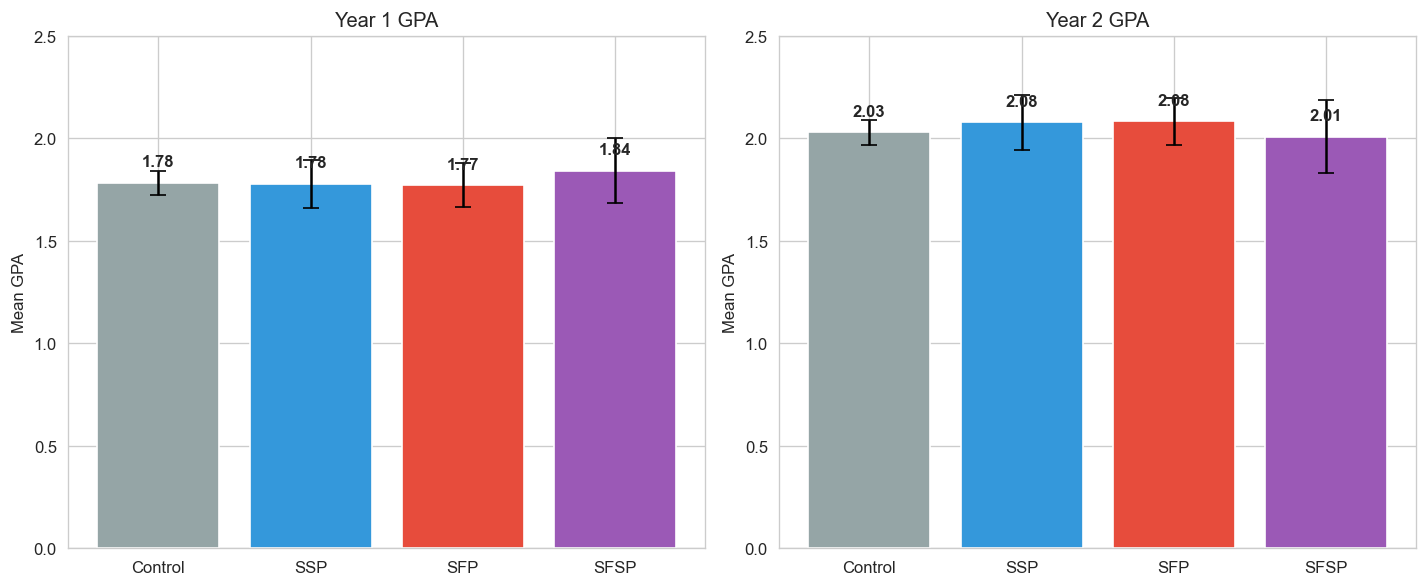

In [11]:
# Mean GPA by treatment group
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, col, title in zip(axes, ["GPA_year1", "GPA_year2"], ["Year 1 GPA", "Year 2 GPA"]):
    means = df.groupby("treatment")[col].mean().reindex(["Control", "SSP", "SFP", "SFSP"])
    sems = df.groupby("treatment")[col].sem().reindex(["Control", "SSP", "SFP", "SFSP"])
    bars = ax.bar(means.index, means.values, yerr=1.96 * sems.values,
                  color=colors, capsize=5)
    ax.set_title(title)
    ax.set_ylabel("Mean GPA")
    ax.set_ylim(0, 2.5)
    for bar, m in zip(bars, means.values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.08,
                f"{m:.2f}", ha="center", fontweight="bold")

plt.tight_layout()
fig.savefig("figures/eda/mean_gpa.png", dpi=150, bbox_inches="tight")
plt.show()

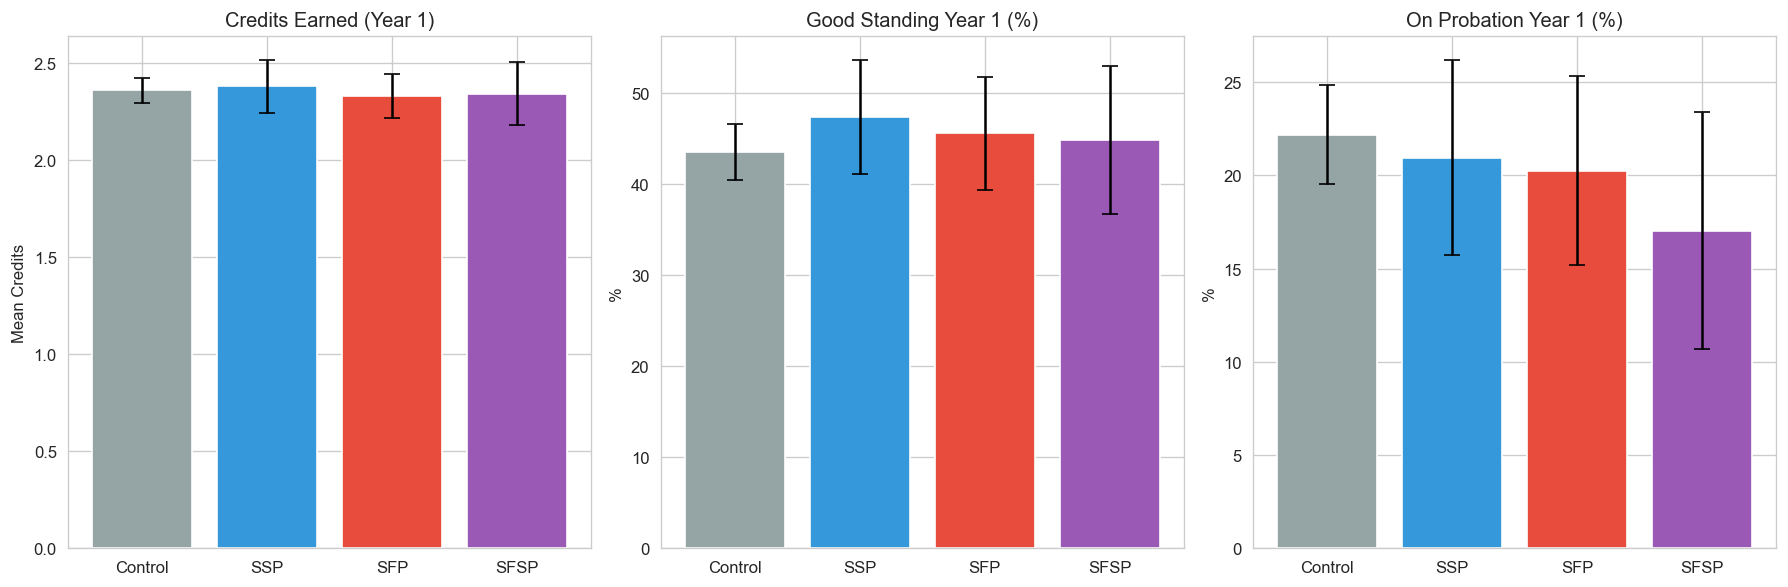

In [12]:
# Credits earned and academic standing
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Credits earned year 1
means = df.groupby("treatment")["credits_earned1"].mean().reindex(["Control", "SSP", "SFP", "SFSP"])
sems = df.groupby("treatment")["credits_earned1"].sem().reindex(["Control", "SSP", "SFP", "SFSP"])
axes[0].bar(means.index, means.values, yerr=1.96 * sems.values, color=colors, capsize=5)
axes[0].set_title("Credits Earned (Year 1)")
axes[0].set_ylabel("Mean Credits")

# Good standing year 1
means = df.groupby("treatment")["goodstanding_year1"].mean().reindex(["Control", "SSP", "SFP", "SFSP"])
sems = df.groupby("treatment")["goodstanding_year1"].sem().reindex(["Control", "SSP", "SFP", "SFSP"])
axes[1].bar(means.index, means.values * 100, yerr=1.96 * sems.values * 100, color=colors, capsize=5)
axes[1].set_title("Good Standing Year 1 (%)")
axes[1].set_ylabel("%")

# Probation year 1
means = df.groupby("treatment")["prob_year1"].mean().reindex(["Control", "SSP", "SFP", "SFSP"])
sems = df.groupby("treatment")["prob_year1"].sem().reindex(["Control", "SSP", "SFP", "SFSP"])
axes[2].bar(means.index, means.values * 100, yerr=1.96 * sems.values * 100, color=colors, capsize=5)
axes[2].set_title("On Probation Year 1 (%)")
axes[2].set_ylabel("%")

plt.tight_layout()
fig.savefig("figures/eda/credits_standing.png", dpi=150, bbox_inches="tight")
plt.show()

## 7. GPA by Subgroups

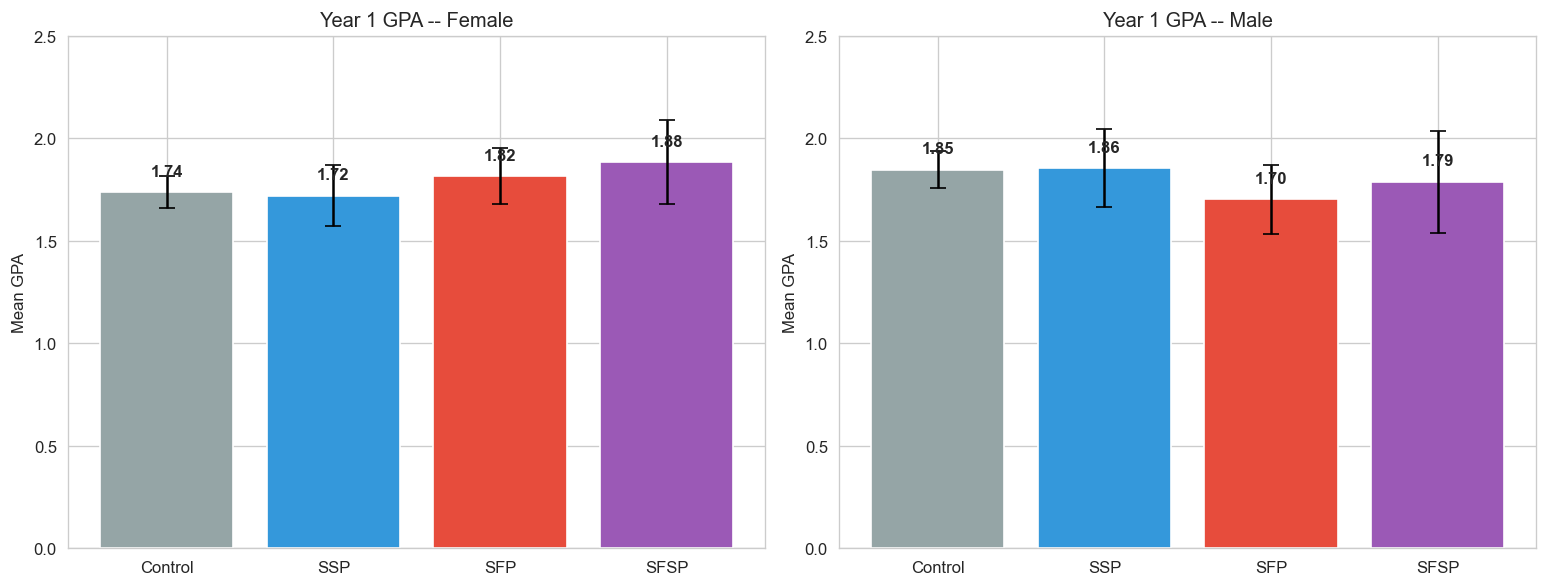

In [13]:
# GPA Year 1 by treatment and sex
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

for ax, sex_val, title in zip(axes, ["F", "M"], ["Female", "Male"]):
    sub = df[df["sex"] == sex_val]
    means = sub.groupby("treatment")["GPA_year1"].mean().reindex(["Control", "SSP", "SFP", "SFSP"])
    sems = sub.groupby("treatment")["GPA_year1"].sem().reindex(["Control", "SSP", "SFP", "SFSP"])
    bars = ax.bar(means.index, means.values, yerr=1.96 * sems.values,
                  color=colors, capsize=5)
    ax.set_title(f"Year 1 GPA -- {title}")
    ax.set_ylabel("Mean GPA")
    ax.set_ylim(0, 2.5)
    for bar, m in zip(bars, means.values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.08,
                f"{m:.2f}", ha="center", fontweight="bold")

plt.tight_layout()
fig.savefig("figures/eda/gpa_by_sex.png", dpi=150, bbox_inches="tight")
plt.show()

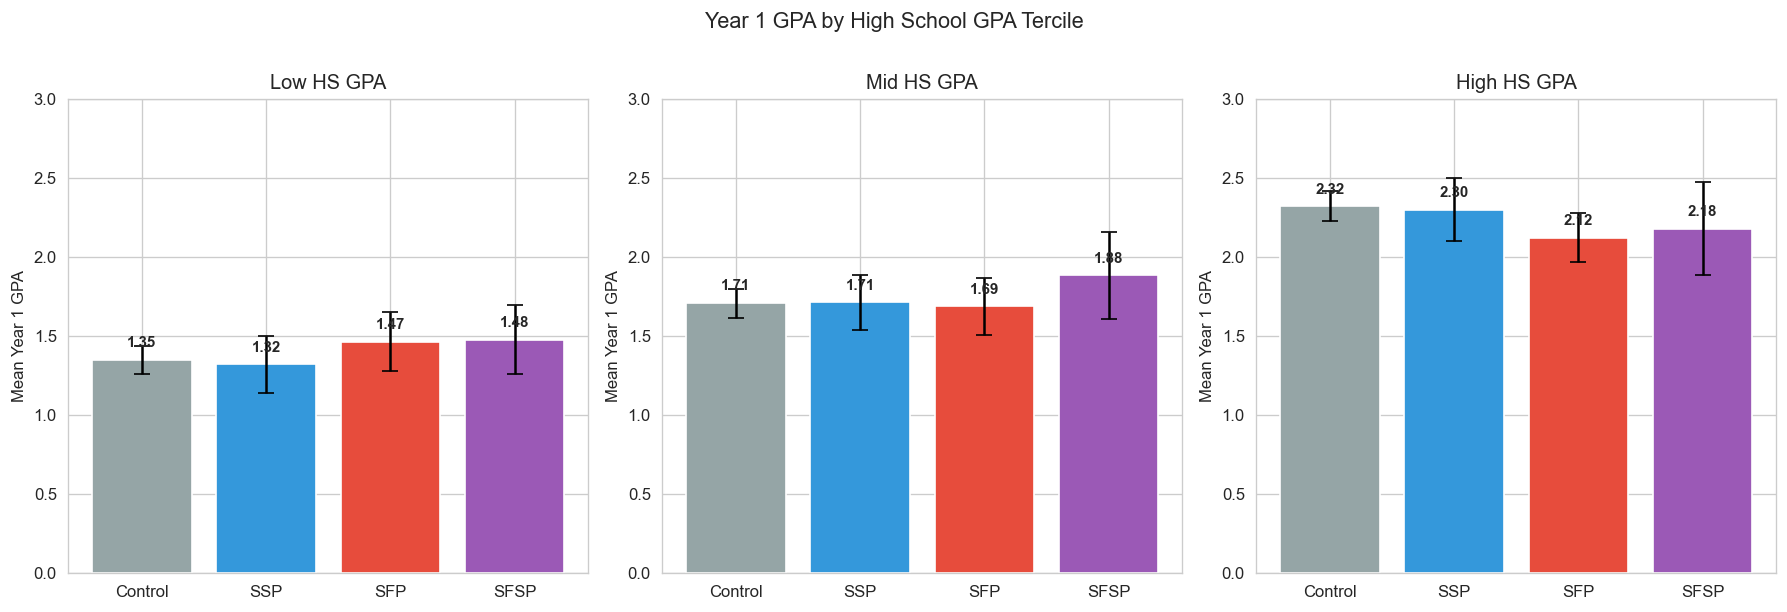

In [14]:
# GPA Year 1 by HS GPA tercile and treatment
df["hs_tercile"] = pd.qcut(df["gpa0"], 3, labels=["Low HS GPA", "Mid HS GPA", "High HS GPA"])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, tercile in zip(axes, ["Low HS GPA", "Mid HS GPA", "High HS GPA"]):
    sub = df[df["hs_tercile"] == tercile]
    means = sub.groupby("treatment")["GPA_year1"].mean().reindex(["Control", "SSP", "SFP", "SFSP"])
    sems = sub.groupby("treatment")["GPA_year1"].sem().reindex(["Control", "SSP", "SFP", "SFSP"])
    bars = ax.bar(means.index, means.values, yerr=1.96 * sems.values,
                  color=colors, capsize=5)
    ax.set_title(f"{tercile}")
    ax.set_ylabel("Mean Year 1 GPA")
    ax.set_ylim(0, 3.0)
    for bar, m in zip(bars, means.values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.08,
                f"{m:.2f}", ha="center", fontsize=9, fontweight="bold")

plt.suptitle("Year 1 GPA by High School GPA Tercile", fontsize=13, y=1.01)
plt.tight_layout()
fig.savefig("figures/eda/gpa_by_hs_tercile.png", dpi=150, bbox_inches="tight")
plt.show()

## 8. Service Usage Among Treated Students

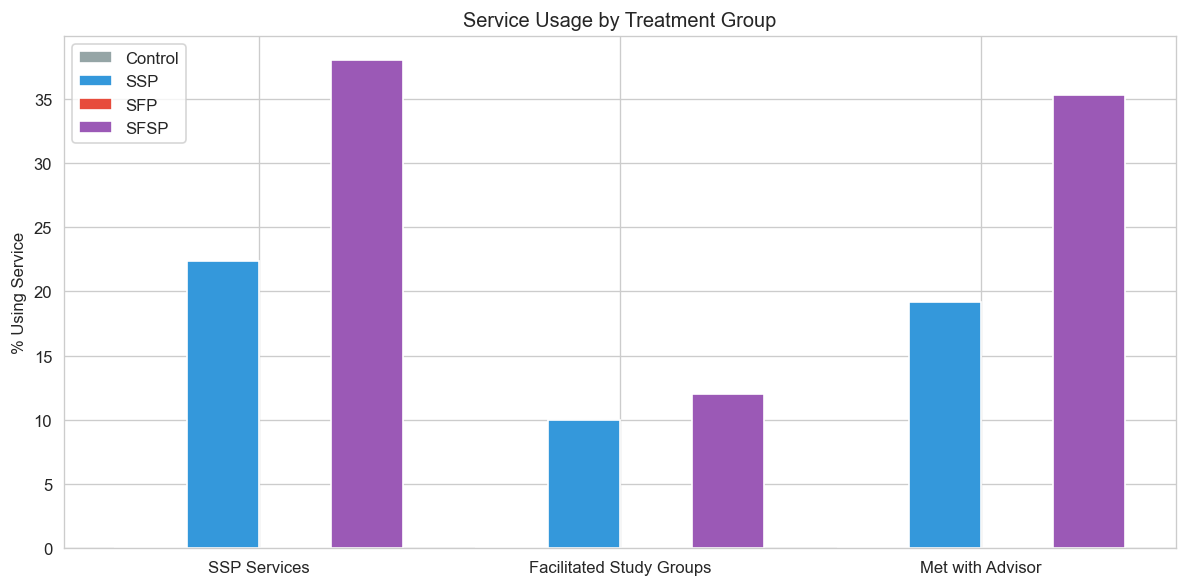

In [15]:
service_vars = ["used_ssp", "used_fsg", "used_adv"]
service_labels = ["SSP Services", "Facilitated Study Groups", "Met with Advisor"]

fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(service_labels))
width = 0.2

for i, (grp, color) in enumerate(zip(["Control", "SSP", "SFP", "SFSP"], colors)):
    sub = df[df["treatment"] == grp]
    rates = [sub[v].mean() * 100 for v in service_vars]
    ax.bar(x + i * width, rates, width, label=grp, color=color)

ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(service_labels)
ax.set_ylabel("% Using Service")
ax.set_title("Service Usage by Treatment Group")
ax.legend()
plt.tight_layout()
fig.savefig("figures/eda/service_usage.png", dpi=150, bbox_inches="tight")
plt.show()

## 9. Correlation Matrix

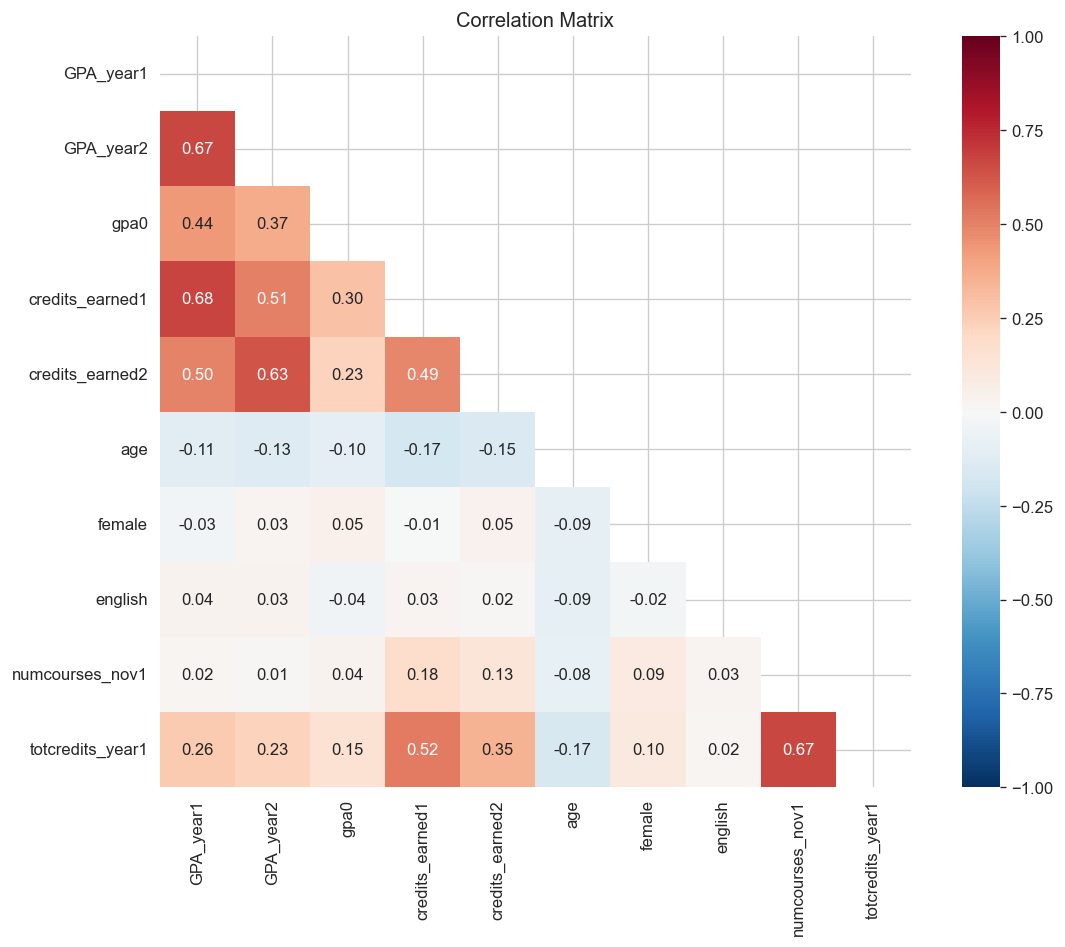

In [16]:
corr_vars = ["GPA_year1", "GPA_year2", "gpa0", "credits_earned1", "credits_earned2",
             "age", "female", "english", "numcourses_nov1", "totcredits_year1"]

corr = df[corr_vars].corr()

fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="RdBu_r",
            center=0, vmin=-1, vmax=1, ax=ax, square=True)
ax.set_title("Correlation Matrix")
plt.tight_layout()
fig.savefig("figures/eda/correlation_matrix.png", dpi=150, bbox_inches="tight")
plt.show()

## 10. No-Shows and Attrition

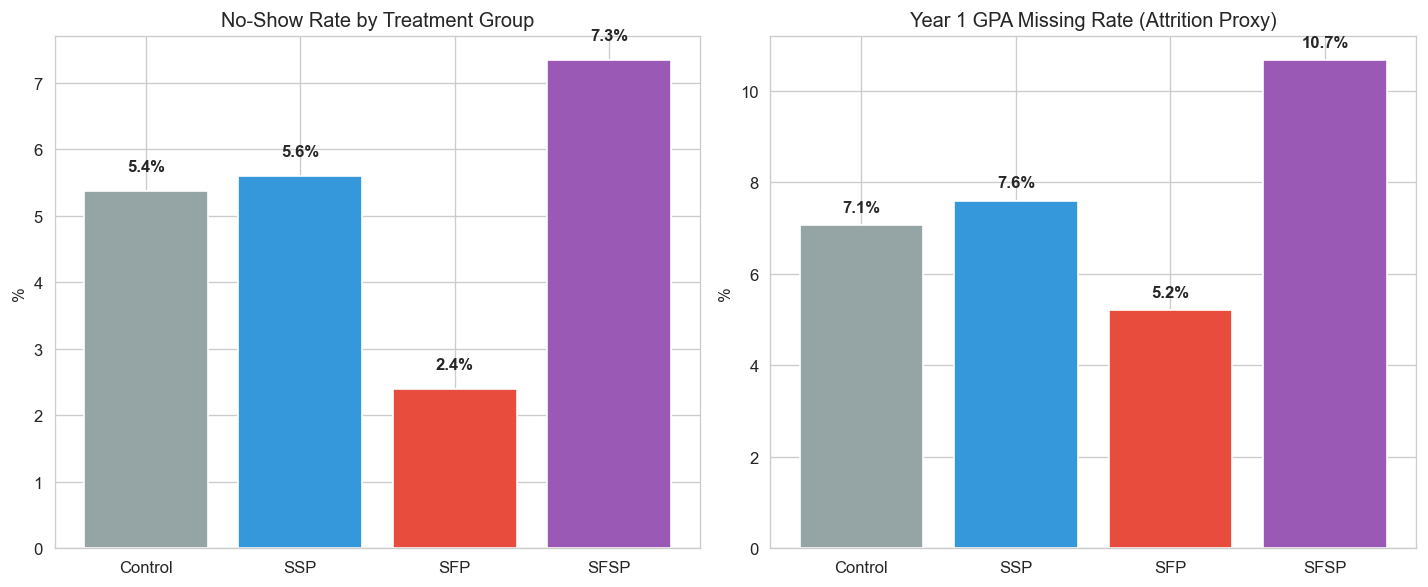

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# No-show rates
noshow = df.groupby("treatment")["noshow"].mean().reindex(["Control", "SSP", "SFP", "SFSP"])
axes[0].bar(noshow.index, noshow.values * 100, color=colors)
axes[0].set_ylabel("%")
axes[0].set_title("No-Show Rate by Treatment Group")
for i, v in enumerate(noshow.values):
    axes[0].text(i, v * 100 + 0.3, f"{v*100:.1f}%", ha="center", fontweight="bold")

# GPA Year 1 missing rate (attrition proxy)
gpa_missing = df.groupby("treatment")["GPA_year1"].apply(lambda x: x.isnull().mean())
gpa_missing = gpa_missing.reindex(["Control", "SSP", "SFP", "SFSP"])
axes[1].bar(gpa_missing.index, gpa_missing.values * 100, color=colors)
axes[1].set_ylabel("%")
axes[1].set_title("Year 1 GPA Missing Rate (Attrition Proxy)")
for i, v in enumerate(gpa_missing.values):
    axes[1].text(i, v * 100 + 0.3, f"{v*100:.1f}%", ha="center", fontweight="bold")

plt.tight_layout()
fig.savefig("figures/eda/noshow_attrition.png", dpi=150, bbox_inches="tight")
plt.show()

## 11. Study Habits

/var/folders/5n/m0cb4ndx66v3t7_fsbn3q1n40000gn/T/ipykernel_2241/3366262605.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=survey, x="lastmin", y="GPA_year1", order=order, palette="Blues", ax=ax)


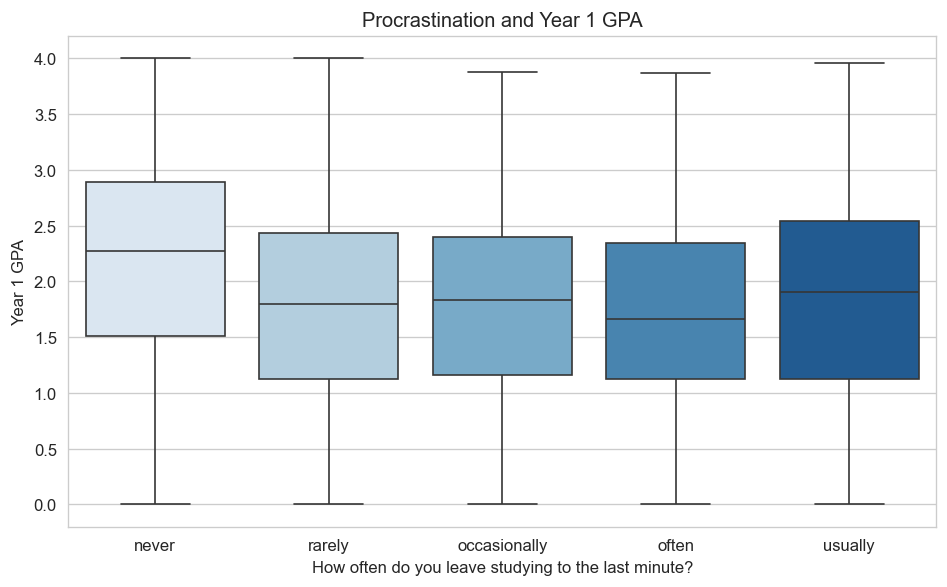

In [18]:
# "Last minute" study habits vs GPA
survey = df.dropna(subset=["lastmin", "GPA_year1"])

order = ["never", "rarely", "occasionally", "often", "usually"]
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=survey, x="lastmin", y="GPA_year1", order=order, palette="Blues", ax=ax)
ax.set_xlabel("How often do you leave studying to the last minute?")
ax.set_ylabel("Year 1 GPA")
ax.set_title("Procrastination and Year 1 GPA")
plt.tight_layout()
fig.savefig("figures/eda/study_habits.png", dpi=150, bbox_inches="tight")
plt.show()

## 12. High School GPA vs. University GPA

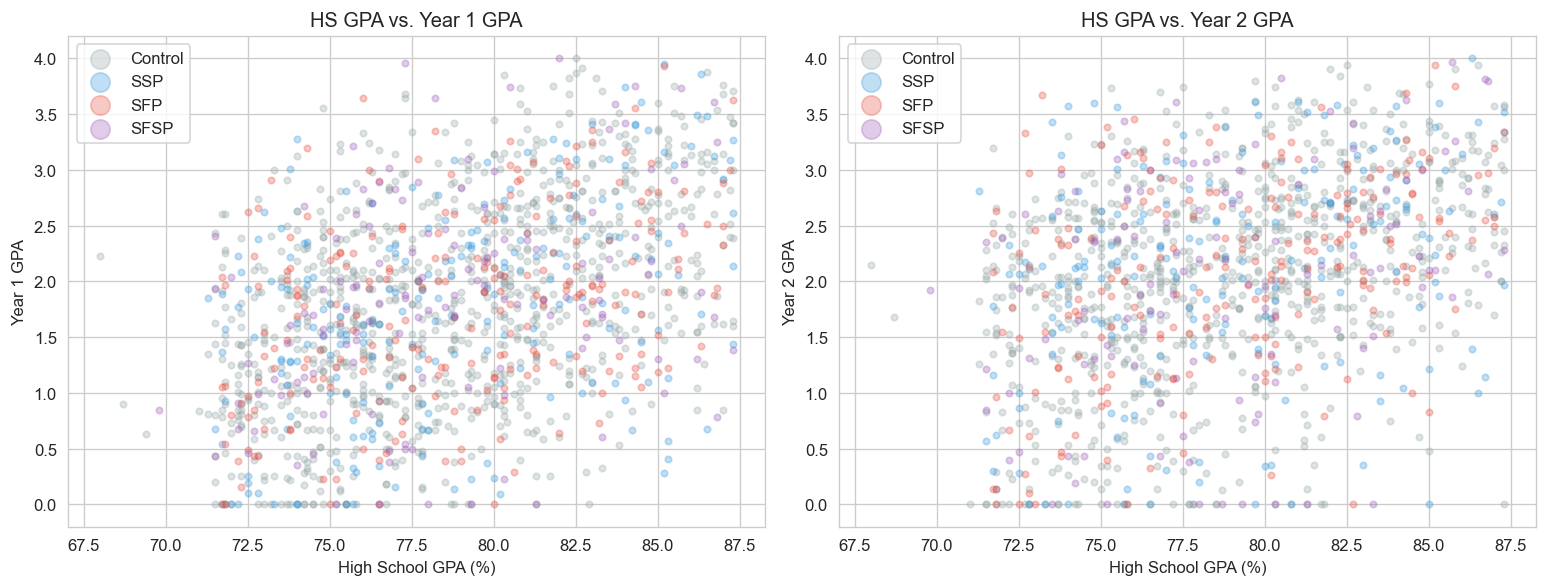

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

for ax, col, title in zip(axes, ["GPA_year1", "GPA_year2"], ["Year 1 GPA", "Year 2 GPA"]):
    for grp, color in zip(["Control", "SSP", "SFP", "SFSP"], colors):
        sub = df[df["treatment"] == grp].dropna(subset=[col])
        ax.scatter(sub["gpa0"], sub[col], alpha=0.3, s=15, color=color, label=grp)
    ax.set_xlabel("High School GPA (%)")
    ax.set_ylabel(title)
    ax.set_title(f"HS GPA vs. {title}")
    ax.legend(markerscale=3)

plt.tight_layout()
fig.savefig("figures/eda/hs_vs_uni_gpa.png", dpi=150, bbox_inches="tight")
plt.show()

## Summary

Key findings from this EDA:

1. **Sample**: 1,656 students -- 1,006 control, 250 SSP, 250 SFP, 150 SFSP.
2. **Missing data**: ~11% of variables are missing for non-survey completers; Year 2 GPA has 17% missing (attrition).
3. **Balance**: Baseline covariates (HS GPA, age, sex, etc.) appear well-balanced across treatment groups, consistent with successful randomization.
4. **Outcomes**: Treatment effects on GPA appear modest in the raw means; subgroup analysis by sex and HS GPA tercile suggests potential heterogeneous effects.
5. **Compliance**: Signup rates vary across treatment arms -- SFP has higher take-up than SSP, consistent with the financial incentive being more attractive.
6. **No-shows**: Low overall (~5%), with some differential rates across groups worth monitoring.
7. **Predictors**: HS GPA is strongly correlated with university GPA; procrastination habits show a clear gradient with academic performance.